In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot


Working with asthma data first

In [96]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/asthma_data.csv')
df.head()

,CensusTract,Asthma_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,10.9,10.4,11.4,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,8.8,8.4,9.3,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,10.3,10.0,10.6,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,9.4,9.1,9.8,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,9.9,9.4,10.5,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [97]:
np.mean(df['Asthma_prevalence'])

10.031229346127787

Dropping MeasureId because all of this health data is from CANCER and dropping columns that I will probably not need, the limits and total population for the health data. Also, changing index to CensusTract.

In [98]:
df.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df.set_index('CensusTract', inplace=True)
df.head()

,Asthma_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,10.9,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,8.8,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,10.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,9.4,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,9.9,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


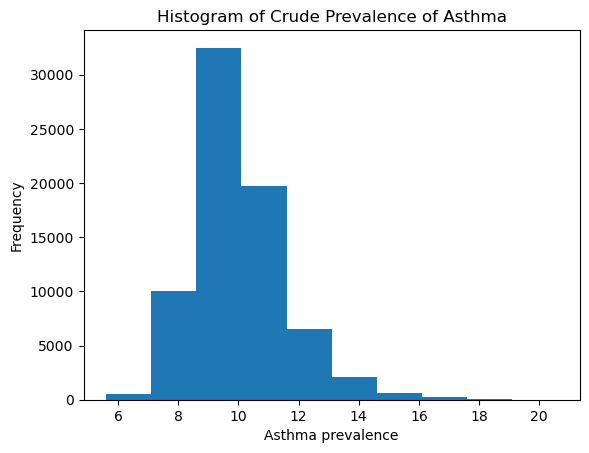

In [99]:
_ = plt.hist(df['Asthma_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Asthma prevalence')
_ = plt.title('Histogram of Crude Prevalence of Asthma')

Visualizing parameters to see any clear correlations.

In [100]:
df.corr()

,Asthma_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
Asthma_prevalence,1.000000,-0.028429,0.110788,-0.018982,-0.017102,-0.024781,-0.003949,0.281981,0.005500,0.127922,-0.037394,-0.000535
PM25,-0.028429,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,0.110788,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.018982,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.017102,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.024781,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.003949,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.281981,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,0.005500,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,0.127922,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


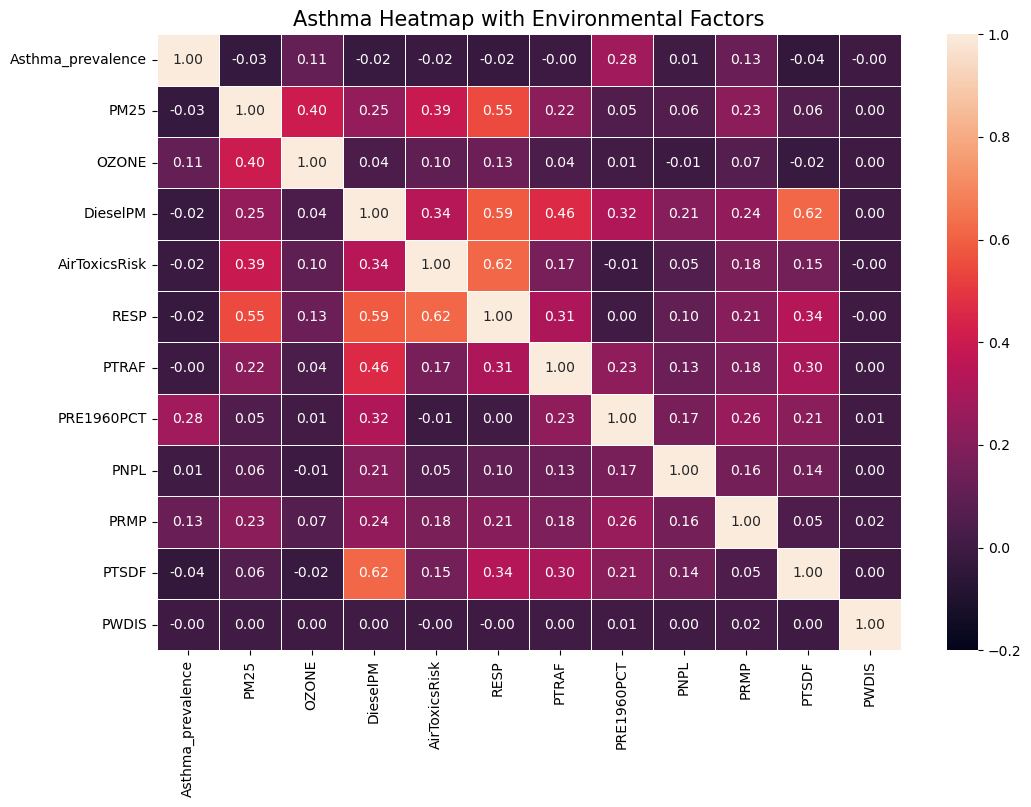

In [151]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)
_ = plt.title("Asthma Heatmap with Environmental Factors", fontsize =15)

Only OZONE, PRE1960PCT, and PRMP show a positive correlation to crude prevalence of asthma.

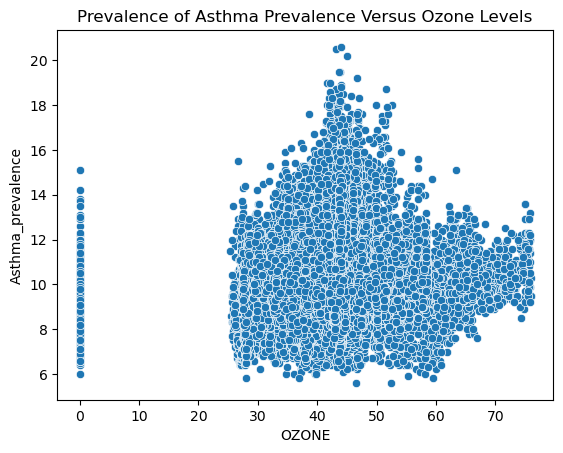

In [102]:
_ = sns.scatterplot(x='OZONE', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Prevalence Versus Ozone Levels')

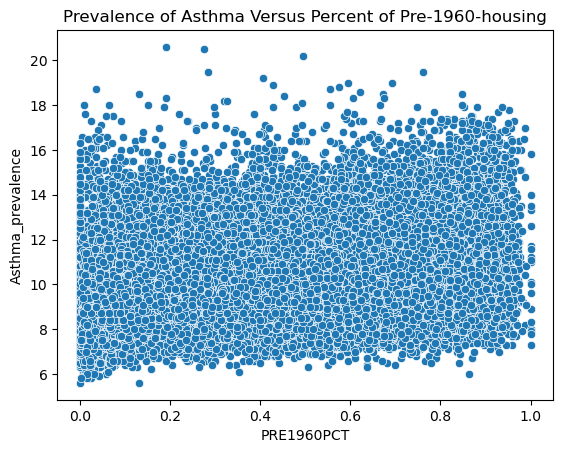

In [103]:
_ = sns.scatterplot(x='PRE1960PCT', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Versus Percent of Pre-1960-housing')

No reasonable correlation.

Asthma prediction using multiple linear regression.

In [104]:
X = df.copy()
X = X.drop('Asthma_prevalence', axis=1)
y = df['Asthma_prevalence']
X.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [105]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [107]:
asthma_model = sm.OLS(y_train, X_train)
res_asthma = asthma_model.fit()

In [108]:
res_asthma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     727.3
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        10:54:19   Log-Likelihood:                -96784.
No. Observations:               54242   AIC:                         1.936e+05
Df Residuals:                   54230   BIC:                         1.937e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.9247      0.042    213.966      0.000       8.843       9.006
PM25             -0.1471      0.005    -28.951      0.000      -0.157      -0.137
OZONE             0.0316      0.001     35.186      0.000       0.030       0.033
DieselPM         -0.6032      0.026    -23.273      0.000      -0.654      -0.552
AirToxicsRisk    -0.0003      0.001     -0.576      0.565      -0.001       0.001
RESP              1.4850      0.069     21.411      0.000       1.349       1.621
PTRAF         -2.882e-05   4.33e-06     -6.653      0.000   -3.73e-05   -2.03e-05
PRE1960PCT        1.9321      0.026     73.780      0.000       1.881       1.983
PNPL             -0.1479      0.023     -6.349      0.000      -0.194      -0.102
PRMP              0.1209      0.006     19.540      0.000       0.109       0.133
PTSDF            -0.0032      0.000     -8.606      0.000      -0.004      -0.003
PWDIS         -1.942e-07   4.07e-05     -0.005      0.996   -7.99e-05    7.95e-05
==============================================================================
Omnibus:                     8860.044   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19293.464
Skew:                           0.965   Prob(JB):                         0.00
Kurtosis:                       5.193   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
df2 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//cancer_data.csv')
df2.head()

,CensusTract,Cancer_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,5.0,4.8,5.2,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,8.0,7.5,8.4,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,6.2,6.0,6.3,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,6.1,5.9,6.3,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,7.1,6.7,7.5,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [110]:
df2.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth', 'CensusTract'], axis=1, inplace=True)
df2.head()

,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,5.0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,8.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,6.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,6.1,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,7.1,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


Dropping MeasureId because all of this health data is from CANCER and dropping columns that I will probably not need, the limits and total population for the health data. Also, changing index to CensusTract.

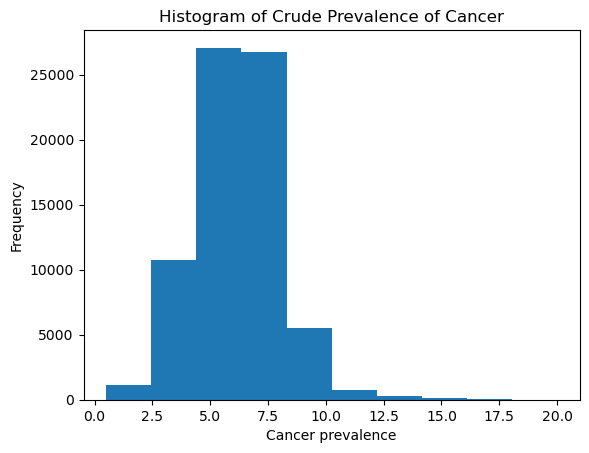

In [111]:
_ = plt.hist(df2['Cancer_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Cancer prevalence')
_ = plt.title('Histogram of Crude Prevalence of Cancer')

In [112]:
df2.corr()

,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
Cancer_prevalence,1.000000,-0.219611,-0.106416,-0.317580,-0.199981,-0.306677,-0.246381,-0.062947,-0.119024,-0.220501,-0.151194,-0.001731
PM25,-0.219611,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.106416,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.317580,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.199981,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.306677,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.246381,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,-0.062947,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.119024,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,-0.220501,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


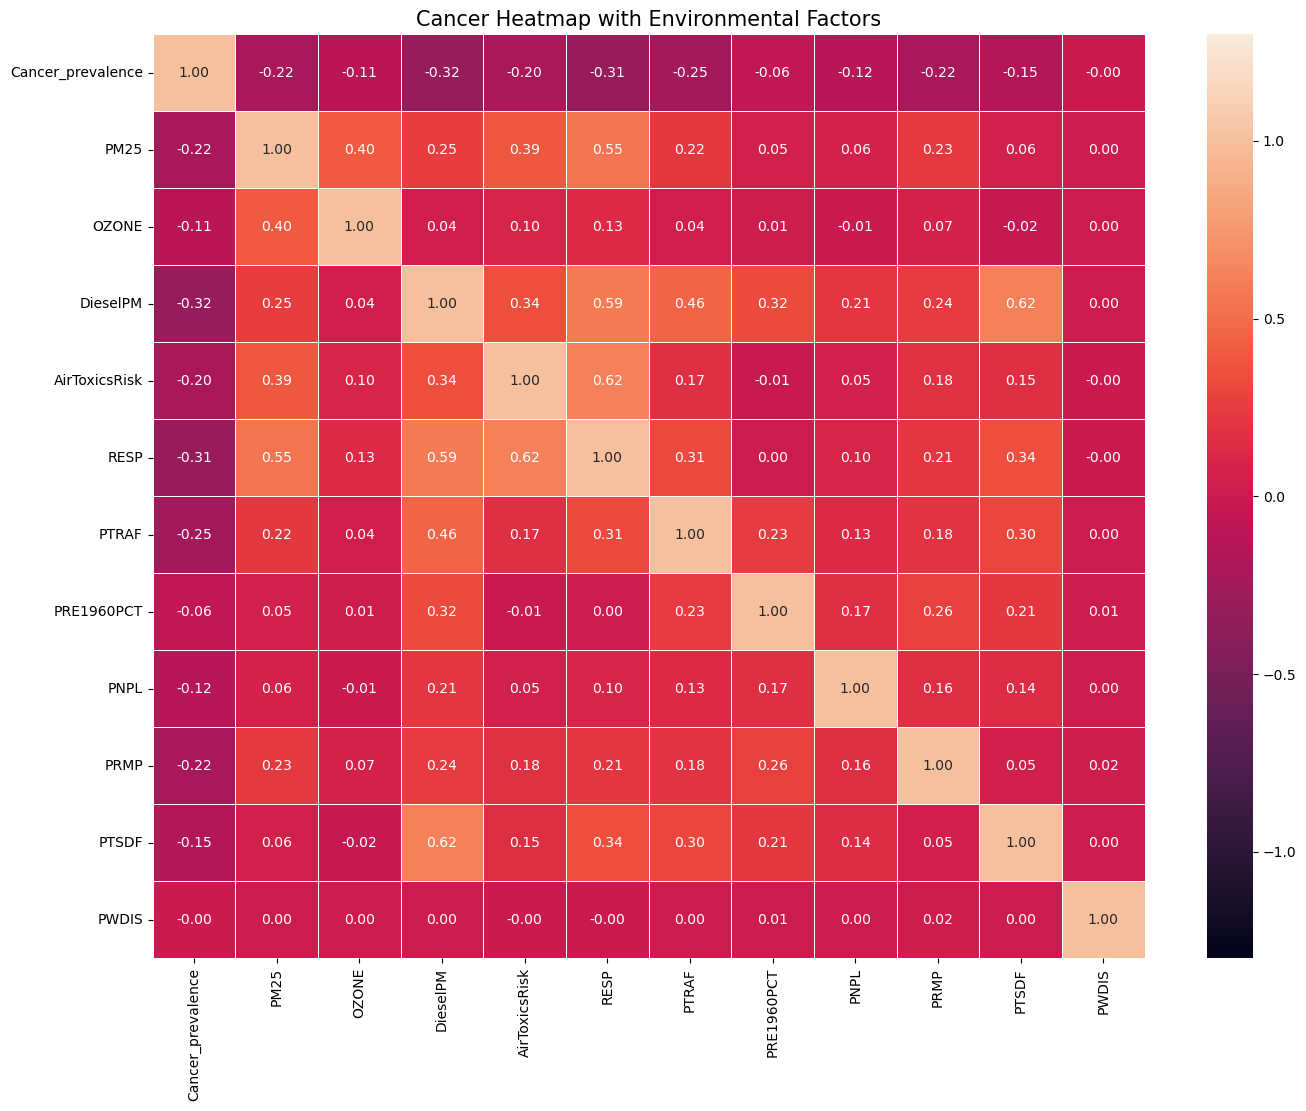

In [152]:
f, ax = plt.subplots(figsize=(16, 12))
_ = sns.heatmap(df2.corr(), vmin=-1.3, vmax=1.3, annot=True, fmt=".2f", linewidth=.5)
_ = plt.title("Cancer Heatmap with Environmental Factors", fontsize =15)

None of these environmental factors are positively correlated with cancer. 

Cancer prediction using multiple linear regression.

In [114]:
X = df2.copy()
X = X.drop('Cancer_prevalence', axis=1)


In [115]:
y = df2['Cancer_prevalence']
X.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [116]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [117]:
cancer_model = sm.OLS(y_train, X_train)
res_cancer = cancer_model.fit()

In [118]:
res_cancer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     952.3
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        10:54:20   Log-Likelihood:            -1.0529e+05
No. Observations:               54242   AIC:                         2.106e+05
Df Residuals:                   54230   BIC:                         2.107e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.2920      0.049    168.713      0.000       8.196       8.388
PM25             -0.0479      0.006     -8.048      0.000      -0.060      -0.036
OZONE            -0.0124      0.001    -11.747      0.000      -0.014      -0.010
DieselPM         -0.9228      0.030    -30.589      0.000      -0.982      -0.864
AirToxicsRisk    -0.0015      0.001     -1.728      0.084      -0.003       0.000
RESP             -1.3020      0.084    -15.556      0.000      -1.466      -1.138
PTRAF            -0.0001   5.11e-06    -23.257      0.000      -0.000      -0.000
PRE1960PCT        0.4207      0.031     13.764      0.000       0.361       0.481
PNPL             -0.3036      0.027    -11.341      0.000      -0.356      -0.251
PRMP             -0.2166      0.007    -29.782      0.000      -0.231      -0.202
PTSDF             0.0034      0.000      7.623      0.000       0.003       0.004
PWDIS         -8.567e-05   4.54e-05     -1.889      0.059      -0.000    3.24e-06
==============================================================================
Omnibus:                    10808.788   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63294.307
Skew:                           0.834   Prob(JB):                         0.00
Kurtosis:                       8.022   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now kidney disease

In [119]:
df3 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//kidney_data.csv')
df3.head()

,CensusTract,Kidney_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,3.1,2.9,3.3,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,2.9,2.7,3.2,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,3.3,3.2,3.4,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,2.7,2.6,2.9,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,3.3,3.0,3.6,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [120]:
df3.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df3.set_index('CensusTract', inplace=True)
df3.head()

,Kidney_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,3.1,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,2.9,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,3.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,2.7,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,3.3,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


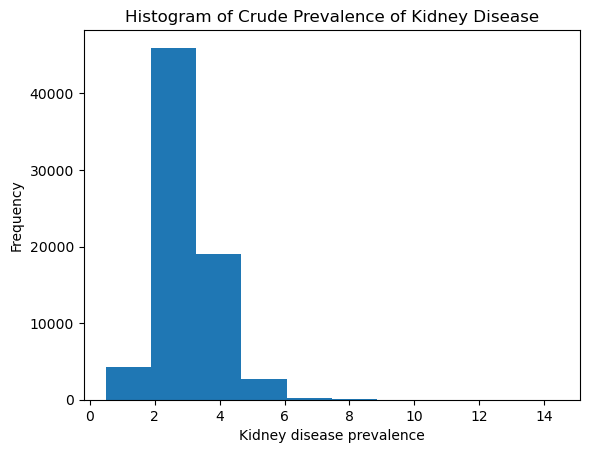

In [121]:
_ = plt.hist(df3['Kidney_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Kidney disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of Kidney Disease')

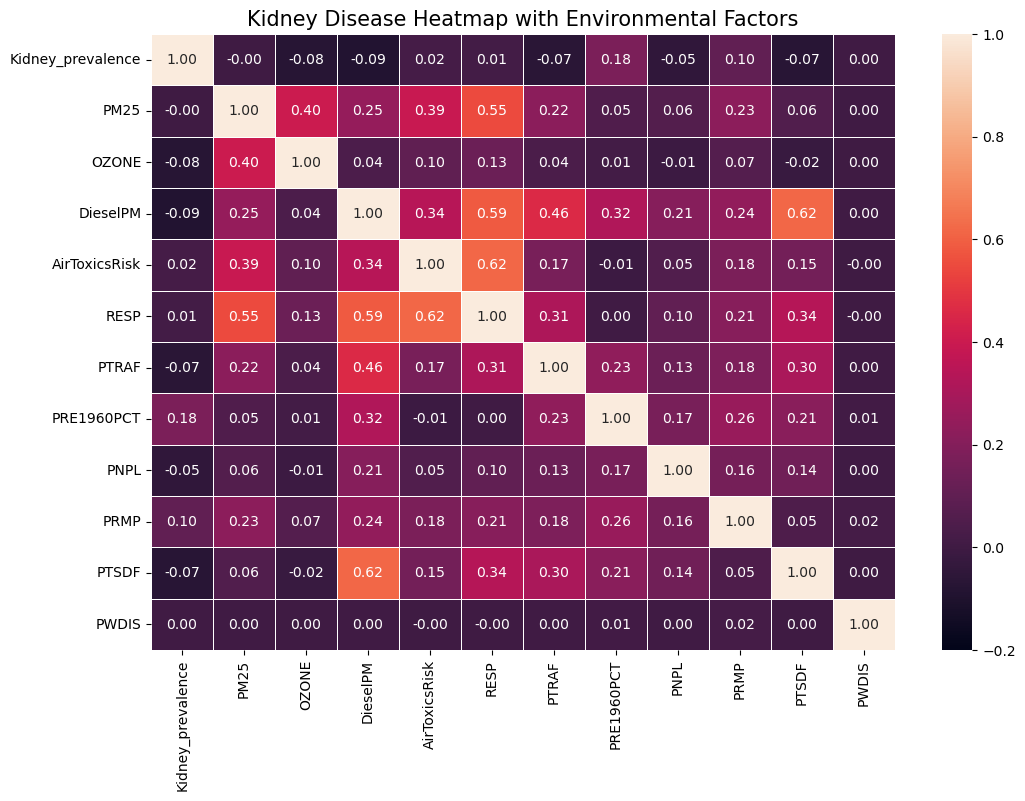

In [153]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df3.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)
_ = plt.title("Kidney Disease Heatmap with Environmental Factors", fontsize =15)

Only PRE1960PCT, and PRMP show a positive correlation of more than .02 to crude prevalence of Kidney problems.

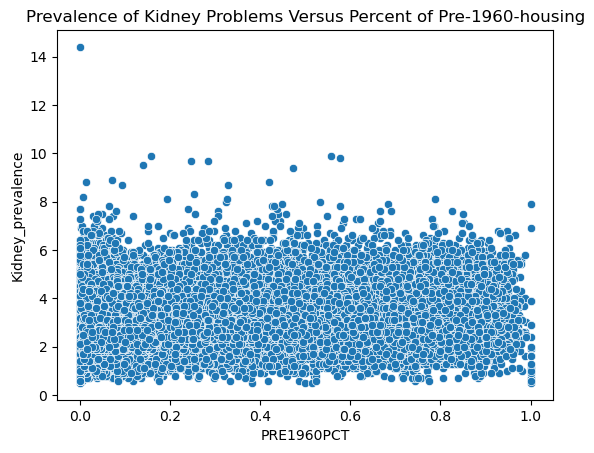

In [123]:
 _ = sns.scatterplot(x='PRE1960PCT', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Problems Versus Percent of Pre-1960-housing')

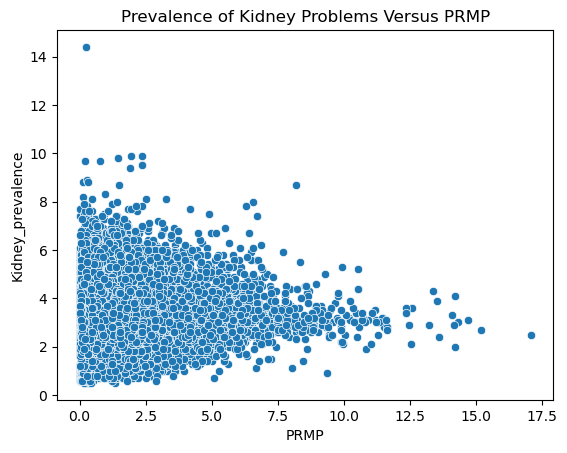

In [124]:
_ = sns.scatterplot(x='PRMP', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Problems Versus PRMP')

No reasonable correlation

Kidney disease prediction using multiple linear regression.

In [125]:
X = df3.copy()
X = X.drop('Kidney_prevalence', axis=1)
y = df3['Kidney_prevalence']

In [126]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [127]:
kidney_model = sm.OLS(y_train, X_train)
res_kidney = kidney_model.fit()

In [128]:
res_cancer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     952.3
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        10:54:20   Log-Likelihood:            -1.0529e+05
No. Observations:               54242   AIC:                         2.106e+05
Df Residuals:                   54230   BIC:                         2.107e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.2920      0.049    168.713      0.000       8.196       8.388
PM25             -0.0479      0.006     -8.048      0.000      -0.060      -0.036
OZONE            -0.0124      0.001    -11.747      0.000      -0.014      -0.010
DieselPM         -0.9228      0.030    -30.589      0.000      -0.982      -0.864
AirToxicsRisk    -0.0015      0.001     -1.728      0.084      -0.003       0.000
RESP             -1.3020      0.084    -15.556      0.000      -1.466      -1.138
PTRAF            -0.0001   5.11e-06    -23.257      0.000      -0.000      -0.000
PRE1960PCT        0.4207      0.031     13.764      0.000       0.361       0.481
PNPL             -0.3036      0.027    -11.341      0.000      -0.356      -0.251
PRMP             -0.2166      0.007    -29.782      0.000      -0.231      -0.202
PTSDF             0.0034      0.000      7.623      0.000       0.003       0.004
PWDIS         -8.567e-05   4.54e-05     -1.889      0.059      -0.000    3.24e-06
==============================================================================
Omnibus:                    10808.788   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63294.307
Skew:                           0.834   Prob(JB):                         0.00
Kurtosis:                       8.022   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now COPD

In [129]:
df4 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//copd_data.csv')
df4.head()

,CensusTract,COPD_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,7.6,6.8,8.5,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,7.2,6.0,8.6,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,9.2,8.5,9.9,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,7.8,7.1,8.6,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,9.8,8.6,11.2,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [130]:
df4.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df4.set_index('CensusTract', inplace=True)
df4.head()

,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,7.6,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,7.2,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,9.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,7.8,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,9.8,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


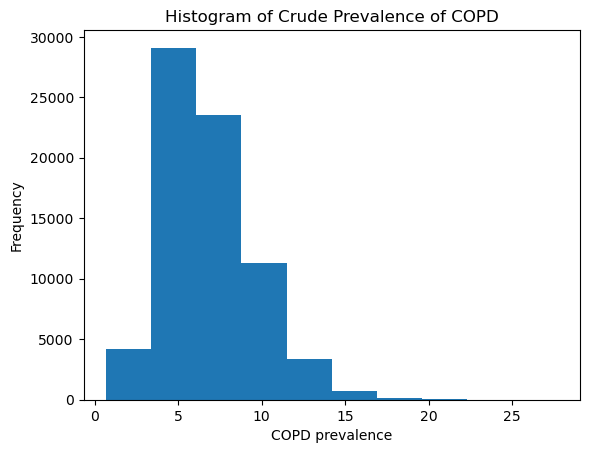

In [131]:
_ = plt.hist(df4['COPD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('COPD prevalence')
_ = plt.title('Histogram of Crude Prevalence of COPD')

In [132]:
df4.corr()

,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
COPD_prevalence,1.000000,-0.039750,-0.078967,-0.256896,-0.054721,-0.097198,-0.180631,0.106012,-0.095000,0.031072,-0.147708,-0.002698
PM25,-0.039750,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.078967,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.256896,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.054721,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.097198,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.180631,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.106012,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.095000,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,0.031072,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


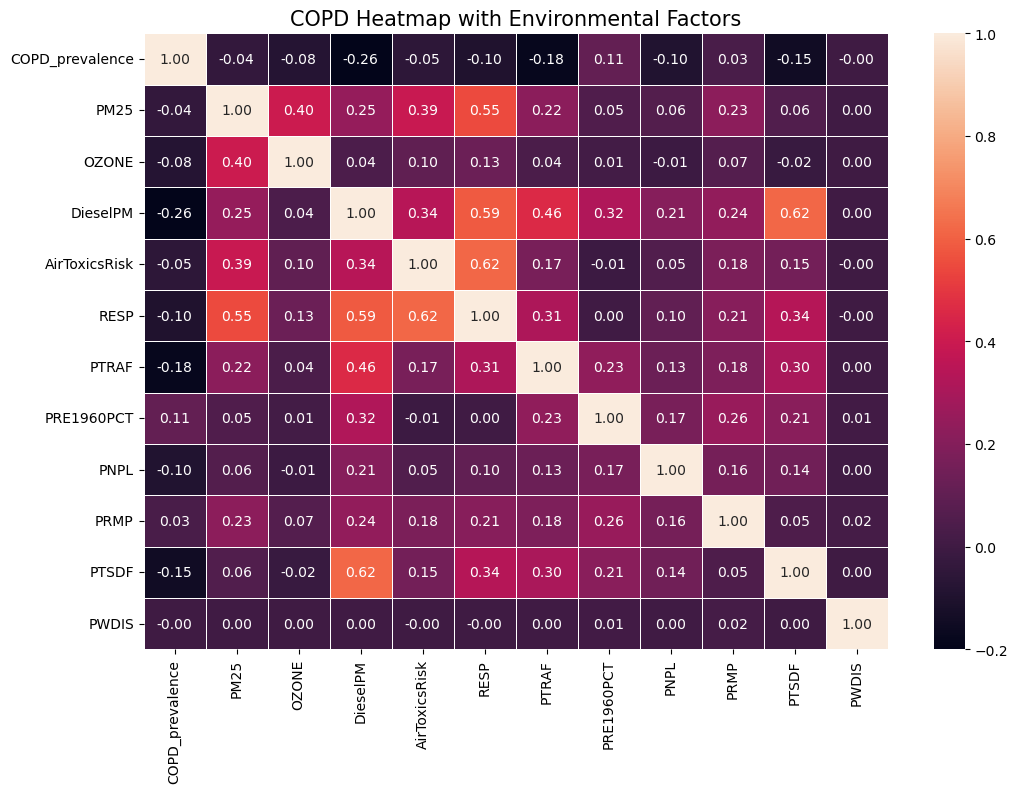

In [154]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df4.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)
_ = plt.title("COPD Heatmap with Environmental Factors", fontsize =15)

Only PRE1960PCT and PRMP show a positive correlation to crude prevalence of COPD.

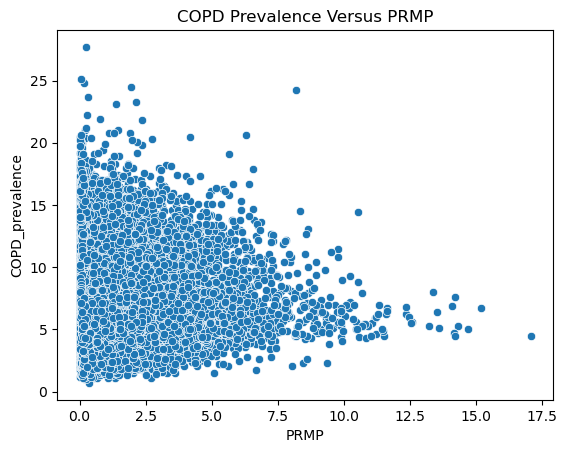

In [134]:
_ = sns.scatterplot(x='PRMP', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus PRMP')

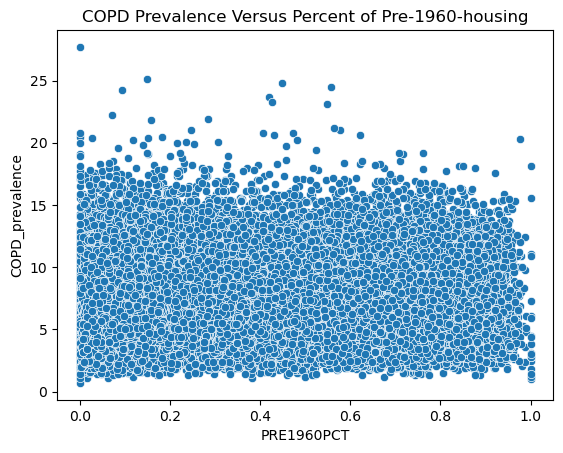

In [135]:
_ = sns.scatterplot(x='PRE1960PCT', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus Percent of Pre-1960-housing')

No reasonable correlations for COPD prevalence.

COPD prediction using multiple linear regression.

In [136]:
X = df4.copy()
X = X.drop('COPD_prevalence', axis=1)
y = df4['COPD_prevalence']

In [137]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [138]:
COPD_model = sm.OLS(y_train, X_train)
res_COPD = COPD_model.fit()

In [139]:
res_COPD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     841.9
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        10:54:21   Log-Likelihood:            -1.2504e+05
No. Observations:               54242   AIC:                         2.501e+05
Df Residuals:                   54230   BIC:                         2.502e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4470      0.070    105.775      0.000       7.309       7.585
PM25              0.0064      0.009      0.758      0.448      -0.010       0.023
OZONE            -0.0306      0.002    -20.141      0.000      -0.034      -0.028
DieselPM         -2.6144      0.043    -60.281      0.000      -2.699      -2.529
AirToxicsRisk    -0.0009      0.001     -0.945      0.344      -0.003       0.001
RESP              2.8575      0.115     24.872      0.000       2.632       3.083
PTRAF            -0.0002   7.35e-06    -26.689      0.000      -0.000      -0.000
PRE1960PCT        2.4871      0.044     56.515      0.000       2.401       2.573
PNPL             -0.6611      0.039    -16.921      0.000      -0.738      -0.585
PRMP              0.1504      0.010     14.527      0.000       0.130       0.171
PTSDF             0.0027      0.001      4.215      0.000       0.001       0.004
PWDIS         -9.391e-06   1.58e-05     -0.596      0.551   -4.03e-05    2.15e-05
==============================================================================
Omnibus:                     8321.535   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16306.923
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       4.893   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the R2 value, these features do not predict COPD well.

Now CHD

In [140]:
df5 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//CHD_data.csv')
df5.head()

,CensusTract,CHD_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,5.9,5.5,6.3,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,7.1,6.4,7.9,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,7.3,7.0,7.7,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,6.4,6.0,6.8,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,7.9,7.2,8.6,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [141]:
df5.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df5.set_index('CensusTract', inplace=True)
df5.head()

,CHD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,5.9,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,7.1,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,7.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,6.4,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,7.9,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


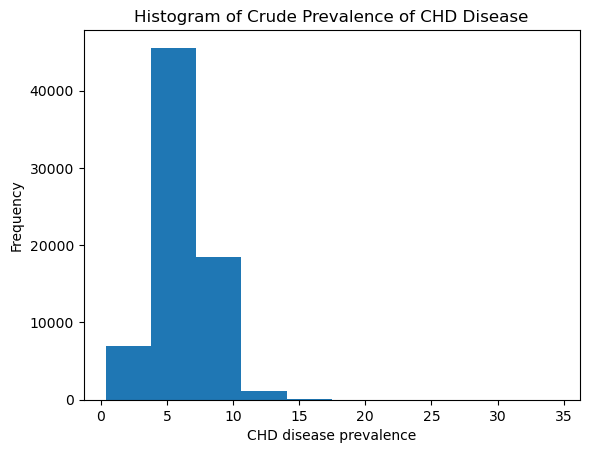

In [142]:
_ = plt.hist(df5['CHD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('CHD disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of CHD Disease')

Visualizing parameters to see any clear correlations.

In [143]:
df5.corr()

,CHD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CHD_prevalence,1.000000,-0.093471,-0.112446,-0.274925,-0.089541,-0.153073,-0.193048,0.082332,-0.104218,-0.021182,-0.144604,0.001107
PM25,-0.093471,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.112446,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.274925,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.089541,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.153073,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.193048,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.082332,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.104218,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,-0.021182,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


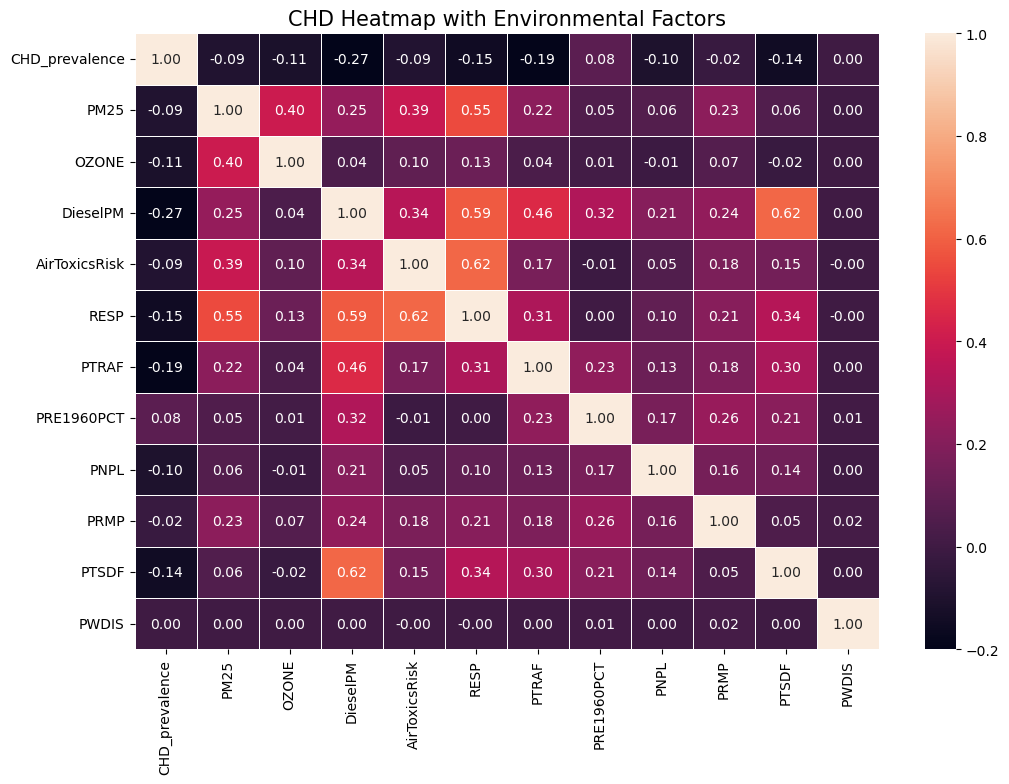

In [155]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df5.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)
_ = plt.title("CHD Heatmap with Environmental Factors", fontsize =15)

Only PRE1960PCT shows a positive correlation to crude prevalence of CHD.

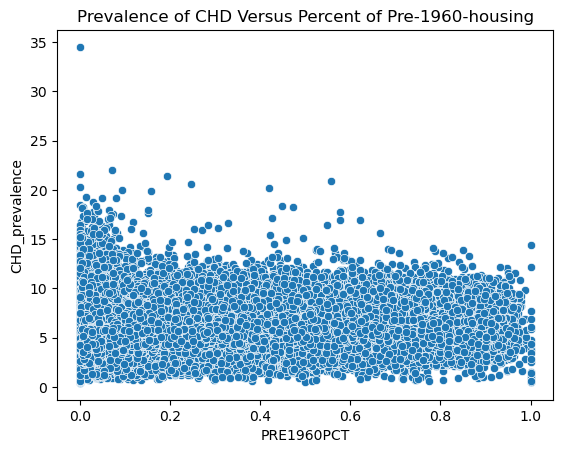

In [145]:
_ = sns.scatterplot(x='PRE1960PCT', y='CHD_prevalence', data=df5)
_ = _.set_title('Prevalence of CHD Versus Percent of Pre-1960-housing')

No reasonable correlation

CHD prediction using multiple linear regression.

In [146]:
X = df5.copy()
X = X.drop('CHD_prevalence', axis=1)
y = df5['CHD_prevalence']

In [147]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [148]:
CHD_model = sm.OLS(y_train, X_train)
res_CHD = CHD_model.fit()

In [149]:
res_CHD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     805.5
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        10:54:22   Log-Likelihood:            -1.0979e+05
No. Observations:               54242   AIC:                         2.196e+05
Df Residuals:                   54230   BIC:                         2.197e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3984      0.053    138.599      0.000       7.294       7.503
PM25             -0.0064      0.006     -0.996      0.319      -0.019       0.006
OZONE            -0.0291      0.001    -25.322      0.000      -0.031      -0.027
DieselPM         -1.8668      0.033    -57.242      0.000      -1.931      -1.803
AirToxicsRisk     0.0003      0.001      0.390      0.696      -0.001       0.002
RESP              1.3131      0.087     15.059      0.000       1.142       1.484
PTRAF            -0.0001   5.52e-06    -24.787      0.000      -0.000      -0.000
PRE1960PCT        1.6601      0.033     49.947      0.000       1.595       1.725
PNPL             -0.5056      0.030    -16.923      0.000      -0.564      -0.447
PRMP              0.0523      0.008      6.693      0.000       0.037       0.068
PTSDF             0.0042      0.000      8.615      0.000       0.003       0.005
PWDIS          7.202e-06   1.19e-05      0.605      0.545   -1.61e-05    3.05e-05
==============================================================================
Omnibus:                    11381.794   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57996.879
Skew:                           0.926   Prob(JB):                         0.00
Kurtosis:                       7.715   Cond. No.                     2.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

None of these diseases can be predicted by multiple linear regression with the environmental factors. All of the R2 values are very low.